$$\textrm{Joaquin Peñuela Parra}$$
$$\textrm{Universidad de los Andes}$$
$$\textrm{Grupo de Física de Altas Energías: Fenomenología de Partículas}$$

$\textbf{Preliminares}$ 

Las librerías que se usan en este capítulo son las siguientes: 

In [1]:
import os, sys

Path_Tutorials = os.path.dirname(os.path.realpath('Capitulo_7_Machine_Learning.ipynb'))
Path_Pheno_BSM = os.path.dirname(Path_Tutorials)
sys.path.append(Path_Pheno_BSM)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from imblearn.under_sampling import RandomUnderSampler #Permite balancear datasets
import xgboost #Gradient Boosting - Modelo de Machine Learning
from sklearn.model_selection import train_test_split #Permite separar los datos en los conjuntos de datos para entrenar y testear el modelo de ML
from sklearn.model_selection import GridSearchCV #Permite optimizar la busqueda de parametros de un modelo de ML
from sklearn.metrics import accuracy_score #Permite calcular la precisión de los modelos de ML


import ml_tools #Herramientas de Machine Learning de Pheno_BSM

personal_folder = f'{Path_Pheno_BSM}/Tutorials'

Welcome to JupyROOT 6.26/06


En este capítulo se utilizan la lista signals por lo que es necesario volverla a definir para no tener inconvenientes:

In [2]:
#Definamos una lista con las señales y un directorio para guardar las secciones eficaces:
signal = "z"
bkgs = ["w_jets", "ww", "wz", "zz", "ttbar", "stop"]

$\textbf{Leer los datos de los archivos .csv}$

In [3]:
Datasets_correlation = {} #Incluye todas las variables cinemáticas del muon 1 y del muon 2
Datasets_Z = {}

Datasets_correlation[signal] = pd.read_csv(f'{personal_folder}/CSV_Z_Analisis/Data_correlation/{signal}.csv')
del Datasets_correlation[signal][Datasets_correlation[signal].columns[0]]
Datasets_Z[signal] = pd.read_csv(f'{personal_folder}/CSV_Z_Analisis/Data_Z/{signal}.csv')
del Datasets_Z[signal][Datasets_Z[signal].columns[0]]

for bkg in bkgs:
    Datasets_correlation[bkg] = pd.read_csv(f'{personal_folder}/CSV_Z_Analisis/Data_correlation/{bkg}.csv')
    del Datasets_correlation[bkg][Datasets_correlation[bkg].columns[0]]
    Datasets_Z[bkg] = pd.read_csv(f'{personal_folder}/CSV_Z_Analisis/Data_Z/{bkg}.csv')
    del Datasets_Z[bkg][Datasets_Z[bkg].columns[0]]

cut_flows = pd.DataFrame.to_dict(pd.read_csv(f'{personal_folder}/CSV_Z_Analisis/cut_flows.csv',index_col = 0))

Lo primero que debemos hacer es contatenar las columnas de todos los datasets para la señal y para el background. En general si tenemos dos DataFrames:

In [4]:
Datasets = {}

In [5]:
Datasets_Z['z']

,pT_{Z}(GeV),#eta_{Z},#phi_{Z},Energy_{Z}(GeV),Mass_{Z}(GeV)
0,47.213483,-1.534149,0.945236,145.289593,89.354202
1,14.953059,3.832559,2.117101,357.121413,90.621762
2,9.157455,-3.080091,-1.506054,134.677836,90.382751
3,8.146394,3.606461,-3.012953,176.139292,92.089275
4,6.498577,-0.048878,-2.057574,95.088935,94.866080
...,...,...,...,...,...
183575,27.404029,1.097467,-2.913288,104.279937,93.766011
183576,14.281423,-2.021167,0.245405,105.735495,90.403486
183577,38.453182,-1.761063,-1.546736,149.764043,95.726823
183578,4.867188,-4.569267,1.539363,252.090740,91.747641


In [6]:
Datasets_correlation['z']

,pT_{#mu}(GeV),#eta_{#mu},#phi_{#mu},Energy_{#mu}(GeV),Mass_{#mu}(GeV),#Delta{R}_{#mu#mu},#Delta{#eta}_{#mu#mu},#Delta{#phi}_{#mu#mu},#Delta{pT}_{#mu#mu}(GeV),#Delta{#vec{pT}}_{#mu#mu}(GeV),#Delta{#vec{p}}_{#mu#mu}(GeV)
0,41.667759,-1.589091,1.830774,106.323796,0.105658,2.357599,1.419015,-1.882729,-3.258949,64.759282,111.898297
1,49.013069,2.201596,3.011407,224.236178,0.105658,2.878910,-0.365673,-2.855592,-7.682663,89.428032,128.674993
2,48.903419,-0.755841,-1.702463,63.550515,0.105658,3.125683,-0.423510,3.096859,-8.941414,88.843422,90.699532
3,40.123135,1.927982,-3.041330,140.853621,0.105658,3.465022,-1.477205,3.134365,-8.142279,72.103526,140.089193
4,39.876068,0.629823,-0.791555,48.050070,0.105658,3.245765,-1.287297,-2.979573,-1.446808,78.048614,94.871234
...,...,...,...,...,...,...,...,...,...,...,...
183575,62.217964,0.448784,-2.960287,68.589473,0.105658,3.113318,-0.232025,3.104660,-27.349991,97.070698,99.369839
183576,51.748001,-0.741654,0.322956,66.644530,0.105658,3.145022,0.453841,-3.112104,-14.222183,89.264361,94.508965
183577,61.150513,-1.181462,-2.142098,109.030373,0.105658,2.602585,0.697675,2.507328,-24.759365,92.998680,117.592600
183578,45.233368,-1.480476,0.059437,104.547205,0.105658,3.056859,-0.374780,3.033798,-0.180176,90.155454,101.322600


En este caso, esas son todas las variables cinemáticas asociadas a la señal Z. Si queremos concatenarlas en solo un DataFrame, para eso hay que usar pd.concat y su parametro axis igualarlo a 1 (cuando vale 0 se concatenan filas).

In [7]:
Datasets['signal'] = pd.concat([Datasets_Z['z'], Datasets_correlation['z']], axis = 1)

In [8]:
Datasets['signal']

,pT_{Z}(GeV),#eta_{Z},#phi_{Z},Energy_{Z}(GeV),Mass_{Z}(GeV),pT_{#mu}(GeV),#eta_{#mu},#phi_{#mu},Energy_{#mu}(GeV),Mass_{#mu}(GeV),#Delta{R}_{#mu#mu},#Delta{#eta}_{#mu#mu},#Delta{#phi}_{#mu#mu},#Delta{pT}_{#mu#mu}(GeV),#Delta{#vec{pT}}_{#mu#mu}(GeV),#Delta{#vec{p}}_{#mu#mu}(GeV)
0,47.213483,-1.534149,0.945236,145.289593,89.354202,41.667759,-1.589091,1.830774,106.323796,0.105658,2.357599,1.419015,-1.882729,-3.258949,64.759282,111.898297
1,14.953059,3.832559,2.117101,357.121413,90.621762,49.013069,2.201596,3.011407,224.236178,0.105658,2.878910,-0.365673,-2.855592,-7.682663,89.428032,128.674993
2,9.157455,-3.080091,-1.506054,134.677836,90.382751,48.903419,-0.755841,-1.702463,63.550515,0.105658,3.125683,-0.423510,3.096859,-8.941414,88.843422,90.699532
3,8.146394,3.606461,-3.012953,176.139292,92.089275,40.123135,1.927982,-3.041330,140.853621,0.105658,3.465022,-1.477205,3.134365,-8.142279,72.103526,140.089193
4,6.498577,-0.048878,-2.057574,95.088935,94.866080,39.876068,0.629823,-0.791555,48.050070,0.105658,3.245765,-1.287297,-2.979573,-1.446808,78.048614,94.871234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183575,27.404029,1.097467,-2.913288,104.279937,93.766011,62.217964,0.448784,-2.960287,68.589473,0.105658,3.113318,-0.232025,3.104660,-27.349991,97.070698,99.369839
183576,14.281423,-2.021167,0.245405,105.735495,90.403486,51.748001,-0.741654,0.322956,66.644530,0.105658,3.145022,0.453841,-3.112104,-14.222183,89.264361,94.508965
183577,38.453182,-1.761063,-1.546736,149.764043,95.726823,61.150513,-1.181462,-2.142098,109.030373,0.105658,2.602585,0.697675,2.507328,-24.759365,92.998680,117.592600
183578,4.867188,-4.569267,1.539363,252.090740,91.747641,45.233368,-1.480476,0.059437,104.547205,0.105658,3.056859,-0.374780,3.033798,-0.180176,90.155454,101.322600


Ahora hagamos lo mismo para todo el background, concatenemos las columnas y luego mezclemoslo todo en un dataset:

In [9]:
Datasets['BKG'] = pd.DataFrame()
for bkg in bkgs:
    bkg_con_todas_las_columnas = pd.concat([Datasets_Z[bkg], Datasets_correlation[bkg]], axis = 1) #Se concatenan las columnas
    Datasets['BKG'] = pd.concat([Datasets['BKG'], bkg_con_todas_las_columnas], axis = 0) #Se concatenan todos los bkg en uno de muchas filas    
    
Datasets['BKG'].index = [i for i in range(len(Datasets['BKG']['pT_{Z}(GeV)']))] #Si no se hace esto habrán index repetidos

In [10]:
Datasets['BKG']

,pT_{Z}(GeV),#eta_{Z},#phi_{Z},Energy_{Z}(GeV),Mass_{Z}(GeV),pT_{#mu}(GeV),#eta_{#mu},#phi_{#mu},Energy_{#mu}(GeV),Mass_{#mu}(GeV),#Delta{R}_{#mu#mu},#Delta{#eta}_{#mu#mu},#Delta{#phi}_{#mu#mu},#Delta{pT}_{#mu#mu}(GeV),#Delta{#vec{pT}}_{#mu#mu}(GeV),#Delta{#vec{p}}_{#mu#mu}(GeV)
0,76.045182,1.845532,2.976046,247.354003,17.357639,55.175060,1.802316,2.834538,171.831530,0.105658,0.494279,0.065297,0.489947,-32.383839,36.668575,97.860499
1,107.694895,0.411918,2.461700,288.263577,263.468987,119.654747,1.017113,2.650762,187.070454,0.105658,3.794853,-3.111893,-2.171873,-95.113440,135.058795,277.111491
2,26.244958,2.541280,1.722080,182.858965,73.046458,37.095261,0.964797,2.580525,55.741588,0.105658,2.656701,1.223575,-2.358161,-8.949480,60.396099,102.128564
3,63.053874,-0.422412,-1.999488,143.057214,125.447026,97.615387,-0.147387,-1.684361,98.677610,0.105658,2.667453,-0.154244,-2.662990,-55.180962,136.686127,136.693764
4,32.451239,-1.417959,-2.872543,85.084278,47.006604,30.952194,-1.231367,2.656533,57.537174,0.105658,1.994801,0.643323,1.888218,-7.566498,44.235453,55.758232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568060,77.148897,-0.229505,-2.089111,109.206791,75.200552,53.446865,-0.425670,-2.799007,58.362663,0.105658,1.565015,0.535903,1.470401,-2.910202,69.778873,75.575173
568061,26.347194,0.682893,0.808287,97.013846,91.324868,54.028954,0.368737,1.563957,57.743940,0.105658,2.692166,-0.393019,-2.663324,-14.770763,90.700011,93.174443
568062,93.985646,-2.852778,-2.668006,886.226264,342.489371,201.549683,-1.365945,2.903974,420.691005,0.105658,2.743185,-0.475284,2.701697,-57.485794,337.520452,345.412698
568063,46.779976,1.365423,1.016565,206.965517,182.508339,98.567680,0.505698,2.149259,111.441991,0.105658,2.651488,-0.137553,-2.647918,-9.170929,182.281012,183.201110


Así, Datasets es un directorio que tiene todas las variables cinematicas de la señal y del background:

In [11]:
Datasets.keys()

dict_keys(['signal', 'BKG'])

$\textbf{Preparar todos los datos en un solo Dataset}$

Para esto debemos añadir una columna de ceros y unos donde el "1" representa que el evento es señal y el "0" representa que el evento es background en Datasets['signal'] y Datasets['BKG']. Luego de eso debemos concatenarlos ambos en un nuevo Dataset.

In [12]:
labels_signal = {'Label': [1 for evento in Datasets['signal']['pT_{Z}(GeV)']]}
Datasets['signal'] = pd.concat([Datasets['signal'], pd.DataFrame.from_dict(labels_signal)], axis = 1)

In [13]:
Datasets['signal']

,pT_{Z}(GeV),#eta_{Z},#phi_{Z},Energy_{Z}(GeV),Mass_{Z}(GeV),pT_{#mu}(GeV),#eta_{#mu},#phi_{#mu},Energy_{#mu}(GeV),Mass_{#mu}(GeV),#Delta{R}_{#mu#mu},#Delta{#eta}_{#mu#mu},#Delta{#phi}_{#mu#mu},#Delta{pT}_{#mu#mu}(GeV),#Delta{#vec{pT}}_{#mu#mu}(GeV),#Delta{#vec{p}}_{#mu#mu}(GeV),Label
0,47.213483,-1.534149,0.945236,145.289593,89.354202,41.667759,-1.589091,1.830774,106.323796,0.105658,2.357599,1.419015,-1.882729,-3.258949,64.759282,111.898297,1
1,14.953059,3.832559,2.117101,357.121413,90.621762,49.013069,2.201596,3.011407,224.236178,0.105658,2.878910,-0.365673,-2.855592,-7.682663,89.428032,128.674993,1
2,9.157455,-3.080091,-1.506054,134.677836,90.382751,48.903419,-0.755841,-1.702463,63.550515,0.105658,3.125683,-0.423510,3.096859,-8.941414,88.843422,90.699532,1
3,8.146394,3.606461,-3.012953,176.139292,92.089275,40.123135,1.927982,-3.041330,140.853621,0.105658,3.465022,-1.477205,3.134365,-8.142279,72.103526,140.089193,1
4,6.498577,-0.048878,-2.057574,95.088935,94.866080,39.876068,0.629823,-0.791555,48.050070,0.105658,3.245765,-1.287297,-2.979573,-1.446808,78.048614,94.871234,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183575,27.404029,1.097467,-2.913288,104.279937,93.766011,62.217964,0.448784,-2.960287,68.589473,0.105658,3.113318,-0.232025,3.104660,-27.349991,97.070698,99.369839,1
183576,14.281423,-2.021167,0.245405,105.735495,90.403486,51.748001,-0.741654,0.322956,66.644530,0.105658,3.145022,0.453841,-3.112104,-14.222183,89.264361,94.508965,1
183577,38.453182,-1.761063,-1.546736,149.764043,95.726823,61.150513,-1.181462,-2.142098,109.030373,0.105658,2.602585,0.697675,2.507328,-24.759365,92.998680,117.592600,1
183578,4.867188,-4.569267,1.539363,252.090740,91.747641,45.233368,-1.480476,0.059437,104.547205,0.105658,3.056859,-0.374780,3.033798,-0.180176,90.155454,101.322600,1


In [14]:
labels_bkg = {'Label': [0 for evento in Datasets['BKG']['pT_{Z}(GeV)']]}
Datasets['BKG'] = pd.concat([Datasets['BKG'], pd.DataFrame.from_dict(labels_bkg)], axis = 1)

In [15]:
Datasets['BKG']

,pT_{Z}(GeV),#eta_{Z},#phi_{Z},Energy_{Z}(GeV),Mass_{Z}(GeV),pT_{#mu}(GeV),#eta_{#mu},#phi_{#mu},Energy_{#mu}(GeV),Mass_{#mu}(GeV),#Delta{R}_{#mu#mu},#Delta{#eta}_{#mu#mu},#Delta{#phi}_{#mu#mu},#Delta{pT}_{#mu#mu}(GeV),#Delta{#vec{pT}}_{#mu#mu}(GeV),#Delta{#vec{p}}_{#mu#mu}(GeV),Label
0,76.045182,1.845532,2.976046,247.354003,17.357639,55.175060,1.802316,2.834538,171.831530,0.105658,0.494279,0.065297,0.489947,-32.383839,36.668575,97.860499,0
1,107.694895,0.411918,2.461700,288.263577,263.468987,119.654747,1.017113,2.650762,187.070454,0.105658,3.794853,-3.111893,-2.171873,-95.113440,135.058795,277.111491,0
2,26.244958,2.541280,1.722080,182.858965,73.046458,37.095261,0.964797,2.580525,55.741588,0.105658,2.656701,1.223575,-2.358161,-8.949480,60.396099,102.128564,0
3,63.053874,-0.422412,-1.999488,143.057214,125.447026,97.615387,-0.147387,-1.684361,98.677610,0.105658,2.667453,-0.154244,-2.662990,-55.180962,136.686127,136.693764,0
4,32.451239,-1.417959,-2.872543,85.084278,47.006604,30.952194,-1.231367,2.656533,57.537174,0.105658,1.994801,0.643323,1.888218,-7.566498,44.235453,55.758232,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568060,77.148897,-0.229505,-2.089111,109.206791,75.200552,53.446865,-0.425670,-2.799007,58.362663,0.105658,1.565015,0.535903,1.470401,-2.910202,69.778873,75.575173,0
568061,26.347194,0.682893,0.808287,97.013846,91.324868,54.028954,0.368737,1.563957,57.743940,0.105658,2.692166,-0.393019,-2.663324,-14.770763,90.700011,93.174443,0
568062,93.985646,-2.852778,-2.668006,886.226264,342.489371,201.549683,-1.365945,2.903974,420.691005,0.105658,2.743185,-0.475284,2.701697,-57.485794,337.520452,345.412698,0
568063,46.779976,1.365423,1.016565,206.965517,182.508339,98.567680,0.505698,2.149259,111.441991,0.105658,2.651488,-0.137553,-2.647918,-9.170929,182.281012,183.201110,0


Ahora volvamos esos dos datasets uno gigante.

In [16]:
Data = pd.concat([Datasets['signal'], Datasets['BKG']], axis = 0)
Data.index = [i for i in range(len(Data['pT_{Z}(GeV)']))] #Si no se hace esto habrán index repetidos

Así,

In [17]:
Data

,pT_{Z}(GeV),#eta_{Z},#phi_{Z},Energy_{Z}(GeV),Mass_{Z}(GeV),pT_{#mu}(GeV),#eta_{#mu},#phi_{#mu},Energy_{#mu}(GeV),Mass_{#mu}(GeV),#Delta{R}_{#mu#mu},#Delta{#eta}_{#mu#mu},#Delta{#phi}_{#mu#mu},#Delta{pT}_{#mu#mu}(GeV),#Delta{#vec{pT}}_{#mu#mu}(GeV),#Delta{#vec{p}}_{#mu#mu}(GeV),Label
0,47.213483,-1.534149,0.945236,145.289593,89.354202,41.667759,-1.589091,1.830774,106.323796,0.105658,2.357599,1.419015,-1.882729,-3.258949,64.759282,111.898297,1
1,14.953059,3.832559,2.117101,357.121413,90.621762,49.013069,2.201596,3.011407,224.236178,0.105658,2.878910,-0.365673,-2.855592,-7.682663,89.428032,128.674993,1
2,9.157455,-3.080091,-1.506054,134.677836,90.382751,48.903419,-0.755841,-1.702463,63.550515,0.105658,3.125683,-0.423510,3.096859,-8.941414,88.843422,90.699532,1
3,8.146394,3.606461,-3.012953,176.139292,92.089275,40.123135,1.927982,-3.041330,140.853621,0.105658,3.465022,-1.477205,3.134365,-8.142279,72.103526,140.089193,1
4,6.498577,-0.048878,-2.057574,95.088935,94.866080,39.876068,0.629823,-0.791555,48.050070,0.105658,3.245765,-1.287297,-2.979573,-1.446808,78.048614,94.871234,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751640,77.148897,-0.229505,-2.089111,109.206791,75.200552,53.446865,-0.425670,-2.799007,58.362663,0.105658,1.565015,0.535903,1.470401,-2.910202,69.778873,75.575173,0
751641,26.347194,0.682893,0.808287,97.013846,91.324868,54.028954,0.368737,1.563957,57.743940,0.105658,2.692166,-0.393019,-2.663324,-14.770763,90.700011,93.174443,0
751642,93.985646,-2.852778,-2.668006,886.226264,342.489371,201.549683,-1.365945,2.903974,420.691005,0.105658,2.743185,-0.475284,2.701697,-57.485794,337.520452,345.412698,0
751643,46.779976,1.365423,1.016565,206.965517,182.508339,98.567680,0.505698,2.149259,111.441991,0.105658,2.651488,-0.137553,-2.647918,-9.170929,182.281012,183.201110,0


Sin embargo, acá estan ordenados, debemos mezclarlos:

In [18]:
Data = Data.sample(frac=1).reset_index(drop=True)

In [19]:
Data

,pT_{Z}(GeV),#eta_{Z},#phi_{Z},Energy_{Z}(GeV),Mass_{Z}(GeV),pT_{#mu}(GeV),#eta_{#mu},#phi_{#mu},Energy_{#mu}(GeV),Mass_{#mu}(GeV),#Delta{R}_{#mu#mu},#Delta{#eta}_{#mu#mu},#Delta{#phi}_{#mu#mu},#Delta{pT}_{#mu#mu}(GeV),#Delta{#vec{pT}}_{#mu#mu}(GeV),#Delta{#vec{p}}_{#mu#mu}(GeV),Label
0,16.048019,-2.697430,3.078437,150.671435,91.600860,43.306690,-1.694108,2.764860,121.812097,0.105658,3.338134,1.529995,2.966859,-14.831865,71.519447,130.502445,0
1,62.594031,1.533363,-1.204738,176.960724,90.989357,73.495972,1.382485,-0.934490,155.655163,0.105658,2.605156,-1.332836,-2.238389,-52.216906,88.266077,162.261623,0
2,10.884994,2.698154,-0.634035,123.957878,93.659598,44.385162,0.393822,0.717992,47.871970,0.105658,2.994284,0.768699,-2.893932,-1.039822,87.058827,97.816675,1
3,18.270398,2.222848,0.387508,124.272927,90.337388,51.150749,0.978146,1.113252,77.634841,0.105658,2.854237,-0.380772,-2.828725,-11.753830,89.460747,95.507056,1
4,30.552773,1.038053,-1.507214,103.702936,91.638243,56.333984,0.558761,-0.818549,65.359390,0.105658,2.643003,-0.438604,-2.606356,-18.265724,91.169888,95.537315,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751640,32.716104,-2.913093,2.923420,314.718595,88.223398,56.411655,-1.723925,2.282189,163.166726,0.105658,2.596400,-0.392738,2.566524,-20.429909,88.789518,88.984427,0
751641,63.941975,0.791296,0.526877,125.535488,92.355489,86.303978,0.599082,0.441445,102.260041,0.105658,2.955859,-0.547774,2.904659,-63.059374,109.035775,121.523898,0
751642,197.410330,0.336593,2.420516,228.722622,93.588070,138.712067,0.260436,2.096182,143.442972,0.105658,0.923175,0.122832,0.914967,-59.334282,110.058629,110.189175,1
751643,23.303104,-2.067905,-2.449101,131.482173,92.322777,49.274284,-1.255944,3.068073,93.521661,0.105658,2.844227,0.952382,2.680037,-12.998215,83.335359,107.751991,1


$\textbf{Balancear Dataset (CREO QUE ESTE PASO NO ES NECESARIO)}$

En este punto es claro que hay más filas de BKG que de signal:

In [20]:
# Data.value_counts('Label')

Para balancear el dataset es necesario escoger 183580 eventos del BKG de manera aleatoria, esto se puede hacer con RandomUnderSampler:

In [21]:
# rus = RandomUnderSampler()
# Data, Data['Label'] = rus.fit_resample(Data, Data['Label'])

Así,

In [22]:
# Data.value_counts('Label')

$\textbf{Separar en X y Y}$

Debemos separar el Dataset en X y Y. Es decir, en input y output para que más adelante sea posible entrenar el modelo de Machine Learning. En este caso es claro que el output es la columna 'Label' y el input son todas las demás columnas:

In [23]:
X = Data.loc[:, Data.columns!= 'Label'] #Todas las filas y sus columnas que sean distintas a 'Label'
Y = Data.loc[:, 'Label']  #Todas las filas de la columna 'target'

Así,

In [24]:
X

,pT_{Z}(GeV),#eta_{Z},#phi_{Z},Energy_{Z}(GeV),Mass_{Z}(GeV),pT_{#mu}(GeV),#eta_{#mu},#phi_{#mu},Energy_{#mu}(GeV),Mass_{#mu}(GeV),#Delta{R}_{#mu#mu},#Delta{#eta}_{#mu#mu},#Delta{#phi}_{#mu#mu},#Delta{pT}_{#mu#mu}(GeV),#Delta{#vec{pT}}_{#mu#mu}(GeV),#Delta{#vec{p}}_{#mu#mu}(GeV)
0,16.048019,-2.697430,3.078437,150.671435,91.600860,43.306690,-1.694108,2.764860,121.812097,0.105658,3.338134,1.529995,2.966859,-14.831865,71.519447,130.502445
1,62.594031,1.533363,-1.204738,176.960724,90.989357,73.495972,1.382485,-0.934490,155.655163,0.105658,2.605156,-1.332836,-2.238389,-52.216906,88.266077,162.261623
2,10.884994,2.698154,-0.634035,123.957878,93.659598,44.385162,0.393822,0.717992,47.871970,0.105658,2.994284,0.768699,-2.893932,-1.039822,87.058827,97.816675
3,18.270398,2.222848,0.387508,124.272927,90.337388,51.150749,0.978146,1.113252,77.634841,0.105658,2.854237,-0.380772,-2.828725,-11.753830,89.460747,95.507056
4,30.552773,1.038053,-1.507214,103.702936,91.638243,56.333984,0.558761,-0.818549,65.359390,0.105658,2.643003,-0.438604,-2.606356,-18.265724,91.169888,95.537315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751640,32.716104,-2.913093,2.923420,314.718595,88.223398,56.411655,-1.723925,2.282189,163.166726,0.105658,2.596400,-0.392738,2.566524,-20.429909,88.789518,88.984427
751641,63.941975,0.791296,0.526877,125.535488,92.355489,86.303978,0.599082,0.441445,102.260041,0.105658,2.955859,-0.547774,2.904659,-63.059374,109.035775,121.523898
751642,197.410330,0.336593,2.420516,228.722622,93.588070,138.712067,0.260436,2.096182,143.442972,0.105658,0.923175,0.122832,0.914967,-59.334282,110.058629,110.189175
751643,23.303104,-2.067905,-2.449101,131.482173,92.322777,49.274284,-1.255944,3.068073,93.521661,0.105658,2.844227,0.952382,2.680037,-12.998215,83.335359,107.751991


In [25]:
pd.DataFrame(Y)

0         0
1         0
2         1
3         1
4         0
         ..
751640    0
751641    0
751642    1
751643    1
751644    0
Name: Label, Length: 751645, dtype: int64

$\textbf{Separar conjunto de datos para "train" y para "test"}$

Separemos un 50% del Dataset para entrenar el modelo, un 25% para testearlo y un 25% para validarlo. Para esto podemos hacer uso de la herramienta train_test_split que se importó al inicio de este capítulo.

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 1) #El random_state es para que siempre que se corra este notebook se haga igual

In [27]:
X_train.shape, X_test.shape

((375822, 16), (375823, 16))

Aquí separamos primero en 50-50 con la idea de ahora separar X_train y Y_train otra vez 50-50, es decir un 25-25 del total de datos, esto con el objetivo de poder entrenar y validar el modelo.

In [28]:
X_valid, X_test, Y_valid, Y_test = train_test_split(X_test, Y_test, test_size = 0.5, random_state = 1)

Así, nos queda:

In [29]:
X_train.shape,X_test.shape, X_valid.shape # 50 - Entrenar, 25 - Testear y 25 - Validar

((375822, 16), (187912, 16), (187911, 16))

In [30]:
Y_train.shape,Y_test.shape, Y_valid.shape # 50 - Entrenar, 25 - Testear y 25 - Validar

((375822,), (187912,), (187911,))

$\textbf{Crear modelo de Machine Learning}$

Para crear un modelo de Gradient Bosting se puede usar xgboost

In [31]:
xgb = xgboost.XGBClassifier() #Modelo clasificador de gradient boosting 

In [32]:
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

Aquí ya podemos usarlo para predecir datos, simplemente hay que usar xgb.predict() donde el parametro sera el input que deseemos evaluar. Por ejemplo, usemos X_valid como input

In [33]:
Y_predict = xgb.predict(X_valid)

In [ ]:
Y_predict

Efectivamente el output es una fila de ceros y unos, comparemos esto con Y_valid que contiene los valores reales de los labels para ver que tan bueno es el modelo:

In [34]:
pd.DataFrame({'Real': Y_valid, 'Predicción' : Y_predict})

,Real,Predicción
95793,0,0
503726,0,0
531642,0,0
587569,1,1
289939,0,0
...,...,...
276816,0,0
238284,0,0
107391,1,0
393916,0,0


Aquí se puede ver que funciona bien en algunos casos y en otros no tanto. Analicemos esto de una forma más rigurosa.

$\textbf{Evaluemos su precisión}$

Para esto usemos X_Valid y Y_valid:

In [35]:
accuracy_score(Y_valid, Y_predict)

0.8635790347558152

Si quisieramos un accuracy más grande es necesario analizar los parametros que contiene el modelo de gradient boosting. Ese modelo tiene un conjunto de parámetros, la idea para mejorar la precisión es buscar los que mejor predigan los datos, para esto lo que se hace es darle opciones al modelo y que el analice todas las posibles combinaciones y así extraíga la mejor:

In [36]:
parameters = {'nthreads': [1], 
             'objective': ['binary:logistic'],
             'learning_rate': [0.05,0.1],
             'n_estimators': [100,200]}

Ahora, usando GridSearcCV se puede entrenar el modelo usando todas las combinaciones posibles de parametros dentro de parameters, esta herramienta buscará la que mejor se ajusta. No obstante, esto se podría demorar bastante, para mejorar su tiempo de ejecución anteriormente dejamos un 25% de los datos para testear, la idea es con ese de 25% definir una función de costo que permita testear cada posible combinación de los parameters, así si en cierta cantidad de rondas la función de costo no mejora entonces se analiza con la siguiente combinación posible de parametros.

In [37]:
fit_params = {'early_stopping_rounds': 10,
             'eval_metric': 'logloss',
             'eval_set': [(X_test, Y_test)] }

Ese diccionario significa que va a analizar hasta la ronda 10 los entrenamientos usando X_test y Y_test evaluados en la función de costo, si en 10 rondas la función de costo no mejora entonces el entrenamiento para, así podemos mejorar el tiempo de ejecución que use GridSearchCV para encontrar los mejores parametros dentro de parameters.

In [38]:
clf = GridSearchCV(xgb, parameters, cv=3, scoring='accuracy') #cv=3 es hacer cross validation 3 veces
clf.fit(X_train, Y_train, **fit_params)

/home/joaco/anaconda3/envs/root_lab/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/joaco/anaconda3/envs/root_lab/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:25:53] WARNING: ../src/learner.cc:627: 
Parameters: { "nthreads" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.66431
[1]	validation_0-logloss:0.63822
[2]	validation_0-logloss:0.61454
[3]	validation_0-logloss:0.59296
[4]	validation_0-logloss:0.57325
[5]	validation_0-logloss:0.55517
[6]	validation_0-logloss:0.53861
[7]	validation_0-logloss:0.52331
[8]	validation_0-logloss:0.50925
[9]	validation_0-logloss:0.49628
[10]	validation_0-logloss:0.48425
[11]	validation_0-logloss:0.47310
[12]	validation_0-logloss:0.46277
[13]	validation_0-logloss:0.45324
[14]	validation_0-logloss:0.44442
[15]	validation_0-logloss:0.43622
[16]	validation_0-logloss:0.42863
[17]	validation_0-logloss:0.42147
[18]	validation_0-logloss:0.41482
[19]	

/home/joaco/anaconda3/envs/root_lab/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/joaco/anaconda3/envs/root_lab/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:26:23] WARNING: ../src/learner.cc:627: 
Parameters: { "nthreads" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.66426
[1]	validation_0-logloss:0.63814
[2]	validation_0-logloss:0.61441
[3]	validation_0-logloss:0.59281
[4]	validation_0-logloss:0.57306
[5]	validation_0-logloss:0.55497
[6]	validation_0-logloss:0.53835
[7]	validation_0-logloss:0.52308
[8]	validation_0-logloss:0.50898
[9]	validation_0-logloss:0.49589
[10]	validation_0-logloss:0.48382
[11]	validation_0-logloss:0.47270
[12]	validation_0-logloss:0.46242
[13]	validation_0-logloss:0.45286
[14]	validation_0-logloss:0.44402
[15]	validation_0-logloss:0.43579
[16]	validation_0-logloss:0.42816
[17]	validation_0-logloss:0.42103
[18]	validation_0-logloss:0.41440
[19]	

/home/joaco/anaconda3/envs/root_lab/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/joaco/anaconda3/envs/root_lab/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:26:51] WARNING: ../src/learner.cc:627: 
Parameters: { "nthreads" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.66426
[1]	validation_0-logloss:0.63810
[2]	validation_0-logloss:0.61435
[3]	validation_0-logloss:0.59270
[4]	validation_0-logloss:0.57295
[5]	validation_0-logloss:0.55482
[6]	validation_0-logloss:0.53823
[7]	validation_0-logloss:0.52294
[8]	validation_0-logloss:0.50889
[9]	validation_0-logloss:0.49591
[10]	validation_0-logloss:0.48384
[11]	validation_0-logloss:0.47275
[12]	validation_0-logloss:0.46247
[13]	validation_0-logloss:0.45295
[14]	validation_0-logloss:0.44410
[15]	validation_0-logloss:0.43591
[16]	validation_0-logloss:0.42820
[17]	validation_0-logloss:0.42106
[18]	validation_0-logloss:0.41439
[19]	

/home/joaco/anaconda3/envs/root_lab/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/joaco/anaconda3/envs/root_lab/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:27:20] WARNING: ../src/learner.cc:627: 
Parameters: { "nthreads" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.66431
[1]	validation_0-logloss:0.63822
[2]	validation_0-logloss:0.61454
[3]	validation_0-logloss:0.59296
[4]	validation_0-logloss:0.57325
[5]	validation_0-logloss:0.55517
[6]	validation_0-logloss:0.53861
[7]	validation_0-logloss:0.52331
[8]	validation_0-logloss:0.50925
[9]	validation_0-logloss:0.49628
[10]	validation_0-logloss:0.48425
[11]	validation_0-logloss:0.47310
[12]	validation_0-logloss:0.46277
[13]	validation_0-logloss:0.45324
[14]	validation_0-logloss:0.44442
[15]	validation_0-logloss:0.43622
[16]	validation_0-logloss:0.42863
[17]	validation_0-logloss:0.42147
[18]	validation_0-logloss:0.41482
[19]	

/home/joaco/anaconda3/envs/root_lab/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/joaco/anaconda3/envs/root_lab/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:28:18] WARNING: ../src/learner.cc:627: 
Parameters: { "nthreads" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.66426
[1]	validation_0-logloss:0.63814
[2]	validation_0-logloss:0.61441
[3]	validation_0-logloss:0.59281
[4]	validation_0-logloss:0.57306
[5]	validation_0-logloss:0.55497
[6]	validation_0-logloss:0.53835
[7]	validation_0-logloss:0.52308
[8]	validation_0-logloss:0.50898
[9]	validation_0-logloss:0.49589
[10]	validation_0-logloss:0.48382
[11]	validation_0-logloss:0.47270
[12]	validation_0-logloss:0.46242
[13]	validation_0-logloss:0.45286
[14]	validation_0-logloss:0.44402
[15]	validation_0-logloss:0.43579
[16]	validation_0-logloss:0.42816
[17]	validation_0-logloss:0.42103
[18]	validation_0-logloss:0.41440
[19]	

/home/joaco/anaconda3/envs/root_lab/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/joaco/anaconda3/envs/root_lab/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:29:09] WARNING: ../src/learner.cc:627: 
Parameters: { "nthreads" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.66426
[1]	validation_0-logloss:0.63810
[2]	validation_0-logloss:0.61435
[3]	validation_0-logloss:0.59270
[4]	validation_0-logloss:0.57295
[5]	validation_0-logloss:0.55482
[6]	validation_0-logloss:0.53823
[7]	validation_0-logloss:0.52294
[8]	validation_0-logloss:0.50889
[9]	validation_0-logloss:0.49591
[10]	validation_0-logloss:0.48384
[11]	validation_0-logloss:0.47275
[12]	validation_0-logloss:0.46247
[13]	validation_0-logloss:0.45295
[14]	validation_0-logloss:0.44410
[15]	validation_0-logloss:0.43591
[16]	validation_0-logloss:0.42820
[17]	validation_0-logloss:0.42106
[18]	validation_0-logloss:0.41439
[19]	

/home/joaco/anaconda3/envs/root_lab/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/joaco/anaconda3/envs/root_lab/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:30:04] WARNING: ../src/learner.cc:627: 
Parameters: { "nthreads" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.63696
[1]	validation_0-logloss:0.59103
[2]	validation_0-logloss:0.55288
[3]	validation_0-logloss:0.52088
[4]	validation_0-logloss:0.49366
[5]	validation_0-logloss:0.47067
[6]	validation_0-logloss:0.45083
[7]	validation_0-logloss:0.43395
[8]	validation_0-logloss:0.41940
[9]	validation_0-logloss:0.40676
[10]	validation_0-logloss:0.39581
[11]	validation_0-logloss:0.38626
[12]	validation_0-logloss:0.37799
[13]	validation_0-logloss:0.37078
[14]	validation_0-logloss:0.36453
[15]	validation_0-logloss:0.35897
[16]	validation_0-logloss:0.35415
[17]	validation_0-logloss:0.34992
[18]	validation_0-logloss:0.34614
[19]	

/home/joaco/anaconda3/envs/root_lab/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/joaco/anaconda3/envs/root_lab/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.63685
[1]	validation_0-logloss:0.59082
[2]	validation_0-logloss:0.55255
[3]	validation_0-logloss:0.52059
[4]	validation_0-logloss:0.49352
[5]	validation_0-logloss:0.47030
[6]	validation_0-logloss:0.45048
[7]	validation_0-logloss:0.43355
[8]	validation_0-logloss:0.41898
[9]	validation_0-logloss:0.40630
[10]	validation_0-logloss:0.39534
[11]	validation_0-logloss:0.38585
[12]	validation_0-logloss:0.37762
[13]	validation_0-logloss:0.37051
[14]	validation_0-logloss:0.36420
[15]	validation_0-logloss:0.35869
[16]	validation_0-logloss:0.35388
[17]	validation_0-logloss:0.34965
[18]	validation_0-logloss:0.34596
[19]	validation_0-logloss:0.34270
[20]	validation_0-logloss:0.33993
[21]	validation_0-logloss:0.33747
[22]	validation_0-logloss:0.33534
[23]	validation_0-logloss:0.33346
[24]	validation_0-logloss:0.33174
[25]	validation_0-logloss:0.33023
[26]	validation_0-logloss:0.32890
[27]	validation_0-logloss:0.32775
[28]	validation_0-logloss:0.32675
[29]	validation_0-loglos

/home/joaco/anaconda3/envs/root_lab/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/joaco/anaconda3/envs/root_lab/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:31:12] WARNING: ../src/learner.cc:627: 
Parameters: { "nthreads" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.63685
[1]	validation_0-logloss:0.59074
[2]	validation_0-logloss:0.55257
[3]	validation_0-logloss:0.52039
[4]	validation_0-logloss:0.49335
[5]	validation_0-logloss:0.47037
[6]	validation_0-logloss:0.45067
[7]	validation_0-logloss:0.43368
[8]	validation_0-logloss:0.41910
[9]	validation_0-logloss:0.40636
[10]	validation_0-logloss:0.39535
[11]	validation_0-logloss:0.38581
[12]	validation_0-logloss:0.37760
[13]	validation_0-logloss:0.37041
[14]	validation_0-logloss:0.36406
[15]	validation_0-logloss:0.35857
[16]	validation_0-logloss:0.35379
[17]	validation_0-logloss:0.34962
[18]	validation_0-logloss:0.34593
[19]	

/home/joaco/anaconda3/envs/root_lab/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/joaco/anaconda3/envs/root_lab/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:31:43] WARNING: ../src/learner.cc:627: 
Parameters: { "nthreads" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.63696
[1]	validation_0-logloss:0.59103
[2]	validation_0-logloss:0.55288
[3]	validation_0-logloss:0.52088
[4]	validation_0-logloss:0.49366
[5]	validation_0-logloss:0.47067
[6]	validation_0-logloss:0.45083
[7]	validation_0-logloss:0.43395
[8]	validation_0-logloss:0.41940
[9]	validation_0-logloss:0.40676
[10]	validation_0-logloss:0.39581
[11]	validation_0-logloss:0.38626
[12]	validation_0-logloss:0.37799
[13]	validation_0-logloss:0.37078
[14]	validation_0-logloss:0.36453
[15]	validation_0-logloss:0.35897
[16]	validation_0-logloss:0.35415
[17]	validation_0-logloss:0.34992
[18]	validation_0-logloss:0.34614
[19]	

/home/joaco/anaconda3/envs/root_lab/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/joaco/anaconda3/envs/root_lab/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:32:25] WARNING: ../src/learner.cc:627: 
Parameters: { "nthreads" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.63685
[1]	validation_0-logloss:0.59082
[2]	validation_0-logloss:0.55255
[3]	validation_0-logloss:0.52059
[4]	validation_0-logloss:0.49352
[5]	validation_0-logloss:0.47030
[6]	validation_0-logloss:0.45048
[7]	validation_0-logloss:0.43355
[8]	validation_0-logloss:0.41898
[9]	validation_0-logloss:0.40630
[10]	validation_0-logloss:0.39534
[11]	validation_0-logloss:0.38585
[12]	validation_0-logloss:0.37762
[13]	validation_0-logloss:0.37051
[14]	validation_0-logloss:0.36420
[15]	validation_0-logloss:0.35869
[16]	validation_0-logloss:0.35388
[17]	validation_0-logloss:0.34965
[18]	validation_0-logloss:0.34596
[19]	

/home/joaco/anaconda3/envs/root_lab/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/joaco/anaconda3/envs/root_lab/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:32:57] WARNING: ../src/learner.cc:627: 
Parameters: { "nthreads" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.63685
[1]	validation_0-logloss:0.59074
[2]	validation_0-logloss:0.55257
[3]	validation_0-logloss:0.52039
[4]	validation_0-logloss:0.49335
[5]	validation_0-logloss:0.47037
[6]	validation_0-logloss:0.45067
[7]	validation_0-logloss:0.43368
[8]	validation_0-logloss:0.41910
[9]	validation_0-logloss:0.40636
[10]	validation_0-logloss:0.39535
[11]	validation_0-logloss:0.38581
[12]	validation_0-logloss:0.37760
[13]	validation_0-logloss:0.37041
[14]	validation_0-logloss:0.36406
[15]	validation_0-logloss:0.35857
[16]	validation_0-logloss:0.35379
[17]	validation_0-logloss:0.34962
[18]	validation_0-logloss:0.34593
[19]	

/home/joaco/anaconda3/envs/root_lab/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/joaco/anaconda3/envs/root_lab/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.63691
[1]	validation_0-logloss:0.59089
[2]	validation_0-logloss:0.55270
[3]	validation_0-logloss:0.52066
[4]	validation_0-logloss:0.49353
[5]	validation_0-logloss:0.47036
[6]	validation_0-logloss:0.45068
[7]	validation_0-logloss:0.43366
[8]	validation_0-logloss:0.41909
[9]	validation_0-logloss:0.40638
[10]	validation_0-logloss:0.39547
[11]	validation_0-logloss:0.38593
[12]	validation_0-logloss:0.37765
[13]	validation_0-logloss:0.37047
[14]	validation_0-logloss:0.36412
[15]	validation_0-logloss:0.35860
[16]	validation_0-logloss:0.35377
[17]	validation_0-logloss:0.34959
[18]	validation_0-logloss:0.34589
[19]	validation_0-logloss:0.34261
[20]	validation_0-logloss:0.33973
[21]	validation_0-logloss:0.33727
[22]	validation_0-logloss:0.33515
[23]	validation_0-logloss:0.33324
[24]	validation_0-logloss:0.33150
[25]	validation_0-logloss:0.33002
[26]	validation_0-logloss:0.32867
[27]	validation_0-logloss:0.32749
[28]	validation_0-logloss:0.32645
[29]	validation_0-loglos

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1, ...),
             param_grid={'learning_rate': [0.05, 0.1],
                         'n_estimators': [100, 200], 'nthreads': [1],
                         'objective': ['binary:logistic']},
             scoring='accuracy')

In [39]:
Best_xgb = clf.best_estimator_ #Ese es el modelo con la mejor combinación de parametros

In [40]:
Best_xgb

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, nthreads=1, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

Evaluemos su precisión usando X_Valid y Y_valid:

In [41]:
Y_predict = Best_xgb.predict(X_valid)

In [42]:
accuracy_score(Y_valid, Y_predict)

0.8642868166312776

Mejoró un poco, así que como se quería es un mejor modelo. Esto se podría mejorar aún más si se pone un mayor número de arboles (n_estimators). La idea es jugar con todos los parametros.

$\textbf{Grafiquemos su distribución de probabilidad (Score)}$

Cada modelo de ML tiene una grafica de Score asociada:

In [43]:
Dist = Best_xgb.predict_proba(X_valid)

In [44]:
Dist #Contiene para cada valor de X_valid la probabilidad de que su output sea 0 y 1 respectivamente.

array([[0.9079468 , 0.09205316],
       [0.9483194 , 0.05168062],
       [0.9329184 , 0.06708159],
       ...,
       [0.9123949 , 0.08760514],
       [0.9253138 , 0.07468624],
       [0.89262617, 0.10737384]], dtype=float32)

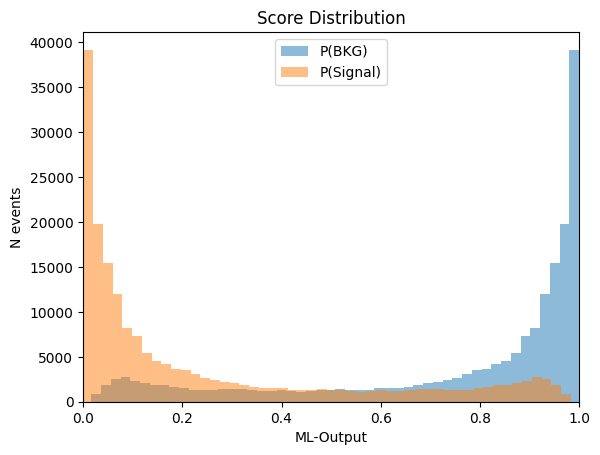

In [45]:
plt.hist(Dist[:,0], label = 'P(BKG)', bins = 50, alpha = 0.5)
plt.hist(Dist[:,1], label = 'P(Signal)', bins = 50, alpha = 0.5)

plt.xlim(0,1)
plt.xlabel('ML-Output')
plt.ylabel('N events')
plt.title('Score Distribution')
plt.legend()
plt.show()

Para cada valor de X (ML_Output) se puede calcular una significancia.

$$ \textbf{Significancia} = \frac{\textrm{Número de Datos de señal}}{ \sqrt{\textrm{Número de Datos de señal + Número de Datos de Background}}} $$

Dado que tenemos la probabilidad simplemente habría que multiplicarla por el número total de eventos y así tendríamos el número de eventos de señal y de background respectivamente.

In [46]:
N_events = len(Dist) #Numero total de eventos

Significances = np.array([])

for i in range(N_events):
    N_Signal = N_events*Dist[1]
    N_BKG = N_events*Dist[0]
    
    Significance = N_Signal / np.sqrt(N_Signal + N_BKG)
    
    Significances = np.append(Significances, Significance)

In [47]:
Significances

array([301.72451459,  59.09141971, 301.72451459, ...,  59.09141971,
       301.72451459,  59.09141971])

Busquemos el máximo para saber cuales son los valores de P(BKG) y P(Signal) que maximizan la significancia.

In [48]:
Dist[np.argmax(Significances)]

array([0.9079468 , 0.09205316], dtype=float32)

Ese sería el mejor corte para calcular la significancia.

$\textbf{Nota:}$ Todo esto se hizó sin recurrir a Pheno_BSM debido a que el código escrito en la carpeta ml_tools está escrito para una estructura de datos particular que no fue la que se uso en estos tutoriales. Sin embargo, si se entiende esto bien no debería haber problema en entender que hace cada función dentro de ml_tools.